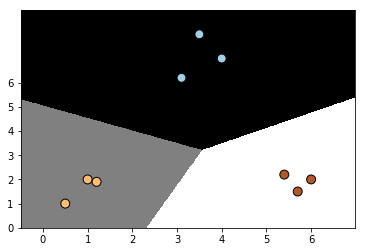

In [4]:
# 逻辑回归是一种分类方法，给定给一个数据点，需要建立一个可以在类之间绘制线性边界的模型
# 逻辑回归既可以对训练数据派生的一组方程进行求解来提取边界

import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

X = np.array([[4,7],[3.5,8],[3.1,6.2],[0.5,1],[1,2],[1.2,1.9],[6,2],[5.7,1.5],[5.4,2.2]])
y = np.array([0,0,0,1,1,1,2,2,2])

# solver 用于设置求解系统方程的算法类型
# C表示正则化强度，数值越小，表示正则化强度越高
# C表示的意义是分类错误的惩罚，数据越高，则惩罚越高，边界会得到一些优化
classifier = linear_model.LogisticRegression(solver='liblinear', C=10000)

# 训练分类器
classifier.fit(X, y)

def plot_classifier(classifier, X, y):
    # 定义图形的取值范围
    x_min, x_max = min(X[:,0]) - 1.0, max(X[:,0]) + 1.0
    y_min, y_max = min(X[:,1]) - 1.0, max(X[:,1]) + 1.0

    # 设置网格数据的步长
    step_size = 0.01

    # 定义网格
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

    mesh_output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])

    mesh_output = mesh_output.reshape(x_values.shape)

    plt.figure()
    plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.gray)
    
    plt.scatter(X[:,0], X[:,1], c=y, s=80, edgecolors='black', linewidths=1, cmap=plt.cm.Paired)
    plt.xlim(x_values.min(), x_values.max())
    plt.ylim(y_values.min(), y_values.max())

    plt.xticks((np.arange(int(min(X[:,0])-1), int(max(X[:,0])+1), 1.0)))
    plt.yticks((np.arange(int(min(X[:,0])-1), int(max(X[:,0])+1), 1.0)))

    plt.show()

plot_classifier(classifier, X, y)